# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that describes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial learning rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to calculate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations
- You are expected to detail your decisions & thinking in comments
- You may use any language you like (although the examples given below are using Python)
- avoid using too many libraries that would do too much of the work for you.
- You can use code below to generate the training data of 10 colours:

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
%matplotlib inline

# Kohonen Implementation

In [37]:
class Distance:
    """
    Collection of distance metrics.
    """
    @staticmethod
    def euclidean(x, y):
        """
        Returns the Euclidean Distance (L2 Norm) between x and y

        Parameters:
        ----------
        x: np.array
            Input (target) vector
        y: np.array
            Weight vector associated with a given node

        Returns:
        --------
        np.array:
            Vector of rank dim(y) where elements are euclidean distances
            from vector x to y
        """
        if x.shape[-1] == y.shape[-1]:
            return np.sqrt(np.sum(((x - y)**2), axis=-1))
        else:
            raise ValueError(f"Input Vector size {x.shape} "
                             f"!= Weight Vector Size {y.shape}")

    @staticmethod
    def manhattan(x, y):
        """
        Returns the Manhattan Distance (L1 Norm) between x and y

        Parameters:
        ----------
        x: np.array
            Input (target) vector
        y: np.array
            Weight vector associated with a given node

        Returns:
        --------
        np.array:
            Vector of rank dim(y) where elements are manhattan distances
            from vector x to y
        """
        if x.shape[-1] == y.shape[-1]:
            return np.sum(np.abs(x - y), axis=-1)
        else:
            raise ValueError(f"Input Vector size {x.shape} "
                             f"!= Weight Vector Size {y.shape}")


class Kohonen:
    """
    Implementation of Kohonen Self Organizing Map (SOM). Training the SOM requires 
    no target vector - it learns to classify the training data without any external
    supervision.
    """

    def __init__(self, network_size, input_data, *args, **kwargs):
        """
        Instantiate a Kohonen object with specific network_size and input_data.

        Parameters:
        ----------
        network_size: tuple
            Dimensions of the Kohonen network
        input_data: np.array
            Collection of vectors of size 3 (RGB)
            e.g. np.random.random((20,3))

        Optional Kwargs:
        ----------------
        lr: int
            Initial Learning Rate, default 0.1
        radius: int
            Initial Radius, default max(network_size) / 2
        distance: str
            Distance Metric, default 'euclidean'
            Available alternative is 'manhattan'
        """
        self.input_data = input_data
        self.network_coordinates = np.indices(network_size).transpose((1,2,0))
        self.network_size = network_size
        self.init_lr = kwargs.get('lr', 0.1)
        self.init_radius = kwargs.get('radius', max(self.network_size) / 2)
        self.weights = np.random.rand(*self.network_size, self.input_data.shape[-1])
        self.distance = kwargs.get('distance', 'euclidean')
        
    @property
    def _distance_metric(self):
        """
        Distance Metric to calculate vector similarities

        Returns:
        --------
        distance_metric: function
            A distance metric used to calculate the distance between two
            vectors. Default is the euclidean distance metric.
        """
        if hasattr(Distance, self.distance):
            return getattr(Distance, self.distance)
        raise ValueError(f"Distance Metric {self.distance} does not exist!")

    def _bmu(self, vector):
        """
        Determine the Best Matching Unit (BMU) by comparing a given vector (neuron)
        with all the nodes in a network. The BMU is the node with the smallest distance
        value i.e. most similar vector to the neuron.

        Parameters:
        ----------
        vector: np.array
            A vector (neuron) of size 3 (in this example representing RGB) selected 
            randomly from input_data.
            e.g. a neuron representing a specific color to compare with all nodes
            in a network to determine which node is most similar (in colour).

        Returns:
        --------
        tuple: coordinates associated with the node that is most similar to vector
        """
        dist = self._distance_metric(vector, self.weights)
        return np.unravel_index(np.argmin(dist), self.network_size)

    def _influence(self, vector):
        """
        Calculates the influence of each node in the network. "Influence"
        is a measure of how much each node's weights will be updated.
        The influence value is impacted by
            - the distance of that node to the BMU
            - how many iterations in the training loop have passed
            - learning rate and radius at current iteration.

        Parameters:
        ----------
        vector: np.array
            A vector (neuron) of size 3 (in this example representing RGB) selected 
            randomly from input_data.
            e.g. a neuron representing a specific color to compare with all nodes
            in a network to determine which node is most similar (in colour).

        Returns:
        --------
        np.array: the influence of each node in the network
        """
        # Find the most similar node
        Z = self._bmu(vector)
        
        # Calculate the distance from Z to all other nodes in network
        dist = self._distance_metric(self.network_coordinates, np.array(Z))
        
        # Calculate and return the influence of each node in the network
        return np.exp(-1. * ((dist**2) / (2 * self.radius**2)))

    def _update_learning_rate(self, epoch, lmbda):
        """
        Update the learning rate for a given iteration. The learning rate
        exponentially decays over the N iterations in the training loop.

        Parameters:
        ----------
        epoch: int
            Current iteration in training loop
        lbmda: int
            time constant used in exponential decay of the learning rate.
        """
        self.lr = self.init_lr * np.exp(-epoch / lmbda)

    def _update_radius(self, epoch, lmbda):
        """
        Update the radius for a given iteration. The radius
        exponentially decays over the N iterations in the training loop.

        Parameters:
        ----------
        epoch: int
            Current iteration in training loop
        lbmda: int
            time constant used in exponential decay of the learning rate.
        """
        self.radius = self.init_radius * np.exp(-epoch / lmbda)

    def _update_weights(self, influence, vector):
        """
        Update the weights of the network for a given iteration. Weights are
        updated using the current learning rate and radius as well as the
        influence of each node and provided input vector (neuron).

        Parameters:
        ----------
        influence: np.array
            influence of each node in a network
        vector: np.array
            A vector (neuron) of size 3 (in this example representing RGB) selected 
            randomly from input_data.
            e.g. a neuron representing a specific color to compare with all nodes
            in a network to determine which node is most similar (in colour).
        """
        # Reshape influence tensor to facilitate broadcasting & multiplication
        influence = np.expand_dims(influence, axis=-1)
        self.weights = self.weights + influence * self.lr * (vector - self.weights)

    def fit(self, epochs):
        """
        Training the network over a specific number of "epochs" or iterations.
        For each pass, a neuron is chosen at random and the learning rate & radius 
        are updated, the BMU is then determined and the influence of each node 
        in the network is calculated. Following this, the weights of each node are 
        updated using the aforementioned updated variables.

        Parameters:
        ----------
        epochs: int
            number of iterations to train the network
        """
        lmbda = (epochs-1) / np.log(self.init_radius)

        for epoch in range(epochs):
            # Update learning rate & radius
            self._update_learning_rate(epoch, lmbda)
            self._update_radius(epoch, lmbda)

            # Select a random vector (colour) from input data
            idx = np.random.randint(len(self.input_data))
            vector = self.input_data[idx]

            # Calculate Influences and Update Weights
            infl = self._influence(vector)
            self._update_weights(infl, vector)

# Utility Functions

In [38]:
from matplotlib.cm import get_cmap
def get_input_data(n_points, colormap='Spectral', start=0, stop=1, show_graph=True):
    """
    Neat little function to get input data. n_points is the number of colours
    and colormap is an optional colormap to get colours from.
    See range of colormap options at 
        https://matplotlib.org/tutorials/colors/colormaps.html
    
    Parameters:
    ----------
    n_points: int
        Number of colours (clusters) to train the SOM
    colormap: str
        Colormap label used to extract input_data points.
        
    Returns:
    ----------
    input_data: np.array
        Random collection of length 3 vectors representative of RGB colours.
        Size is (n_points, 3)
    """
    cmap = get_cmap(colormap)
    input_data = np.array([np.array(cmap(i)[:-1]) 
                           for i in np.linspace(start, stop, n_points)])
    if show_graph:
        plt.imshow(np.reshape(input_data, (1,-1,3)))
        plt.axis('off')
    
    np.random.shuffle(input_data)
    return input_data


def plot_results(network_size=(10, 10),
                 list_of_epochs=[100, 200, 500, 1000],
                 show_graphs=True):
    """
    Training a Kohonen SOM for a list of epochs and store the 
    weights and time taken to train the network in a dictionary.
    
    Plot the weights for each network.
    Plot the Time vs Number of Epochs line plot.
    Return the results in a dictionary.

    Parameters:
    ----------
    network_size: tuple
        Size of the Kohonen SOM
    list_of_epochs: list
        List of iterations that the Kohonen SOM should be trained over.
        
    Returns:
    ----------
    results: dict
        Dictionary containing the results of the various training loops.
            Keys are number of epochs. Values are "weights" and "time"
    """
    results = {}
    for epochs in list_of_epochs:
        results[epochs] = {}

        # Instantiate a Learner object to train the network
        k_learner = Kohonen(network_size, input_data)

        t = %timeit -o k_learner.fit(epochs)

        # Save the time taken and the weights
        results[epochs]['time'] = round(t.average*1000, 2)
        results[epochs]['weights'] = k_learner.weights

    if show_graphs:
        # Plot the weights for each number of epochs
        fig, axs = plt.subplots(1, len(results), figsize=(10, 5))
        for i, e in enumerate(sorted(results.keys())):
            axs[i].imshow(results[e]['weights'])
            axs[i].set_xticks([])
            axs[i].set_yticks([])
            axs[i].set_title(f'{e} Iterations\n{results[e]["time"]} ms')
        plt.show()

        # Plot the time vs iterations trade-off
        plt.figure(figsize=(9, 5))
        keys = sorted(results.keys())
        plt.plot(keys, [results[k]['time'] for k in keys])
        plt.xlabel(f'Iterations')
        plt.ylabel('Time Spent Training (ms)')
        plt.title(f'Time vs Iterations Training Kohonen SOM')
        plt.show()

    return results

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

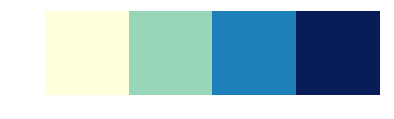

In [39]:
# Example of get_input_data function
input_data=get_input_data(4, colormap='YlGnBu')

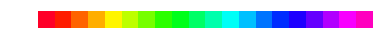

In [40]:
# In the example provided, a 20x3 array was suggested:
input_data=get_input_data(20, colormap='gist_rainbow')

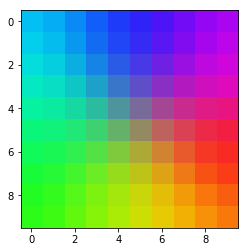

In [41]:
network_size = (10,10)
k_learner = Kohonen(network_size, input_data)
k_learner.fit(500)

plt.imshow(k_learner.weights);

6.09 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.6 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.4 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
64 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


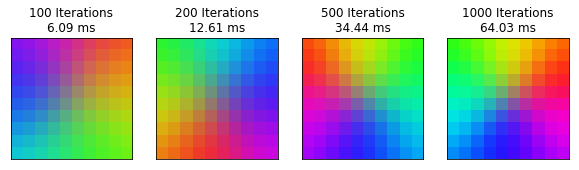

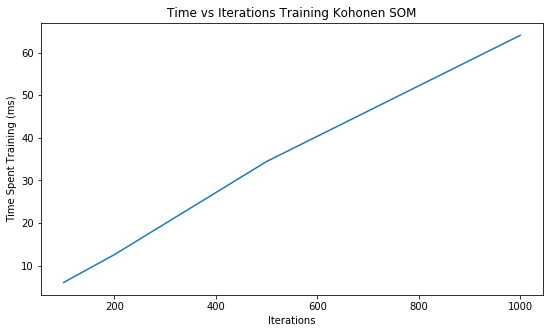

In [7]:
results_10 = plot_results()

In [9]:
results_20 = plot_results(network_size=(20,20), show_graphs=False)

8.36 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.4 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
43.4 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.4 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
results_50 = plot_results(network_size=(50,50), show_graphs=False)

20.1 ms ± 759 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
42 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
101 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
195 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

66.5 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
126 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
326 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
629 ms ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


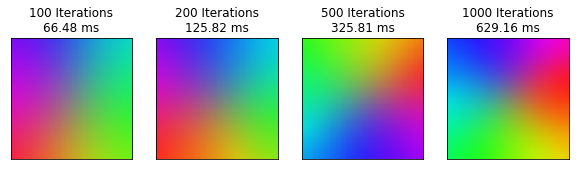

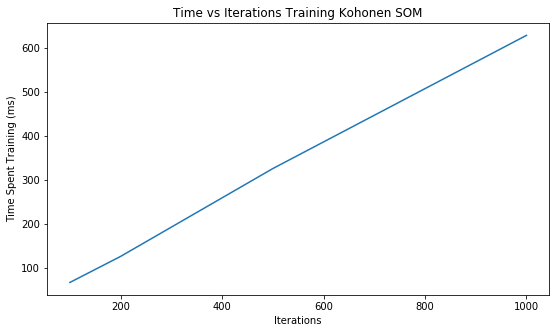

In [11]:
results_100 = plot_results(network_size=(100,100))

# Comparing Results

In [12]:
colors = get_input_data(4, colormap='Set2', start=0.2, stop=0.6, show_graph=False)

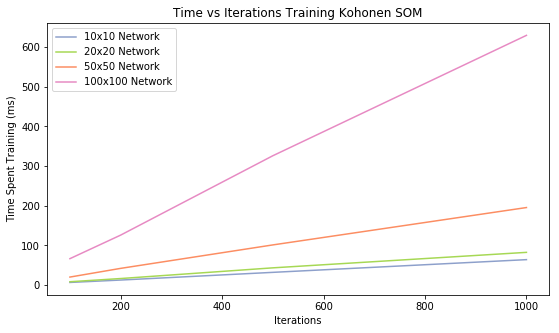

In [13]:
plt.figure(figsize=(9,5))                     
keys = sorted(results_10.keys())

for res, color in zip([results_10, results_20, results_50, results_100], colors):
    size = res[100]['weights'].shape[0]
    plt.plot(keys,[res[k]['time'] for k in keys], c=color,
             label=f'{size}x{size} Network')
    
plt.xlabel('Iterations')
plt.ylabel('Time Spent Training (ms)')
plt.title('Time vs Iterations Training Kohonen SOM')
plt.legend();

### cProfile
Using the inbuilt python profiler `cProfile`, we can acquire further insight into which functions are the most expensive when training the network. The top total time functions (`tottime`) include numpy universal functions in reducing arrays as well as calculating distances, updating weights and influence values. Note that these have been dramatically reduced as a result of vectorizing many of the processes that occur in the training loop, which has led to a significant increase in speed when training the network.

In [14]:
network_size = (100,100)
k_learner = Kohonen(network_size, input_data)

In [15]:
import cProfile
cProfile.run('k_learner.fit(1000)', sort='tottime')

         33004 function calls in 0.677 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000    0.178    0.000    0.184    0.000 <ipython-input-2-a4203cc9338c>:185(_update_weights)
     2000    0.172    0.000    0.172    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     2000    0.170    0.000    0.350    0.000 <ipython-input-2-a4203cc9338c>:5(euclidean)
     1000    0.095    0.000    0.470    0.000 <ipython-input-2-a4203cc9338c>:127(_influence)
     1000    0.011    0.000    0.011    0.000 {method 'argmin' of 'numpy.ndarray' objects}
     1000    0.007    0.000    0.007    0.000 {method 'randint' of 'mtrand.RandomState' objects}
     2000    0.007    0.000    0.180    0.000 fromnumeric.py:1778(sum)
        1    0.006    0.006    0.677    0.677 <ipython-input-2-a4203cc9338c>:205(fit)
     1000    0.006    0.000    0.006    0.000 <ipython-input-2-a4203cc9338c>:157(_update_learning_rate)
     2000    0.004    0.000    

## Improvements
### 1. Weight Initialization:
Significant research has been conducted on weight initialization. In particular, studies have shown that initializing weights, which are too small or too large can have negative effects on a model e.g. shrinking or exploding gradients.

Thus, further attention could be placed on determining optimal initial weights to better train the Kohonen SOM. Two such examples are the `Xavier/Glorot Initialization` and `He Normal (He et al) Initialization` discussed [here.](https://mc.ai/xavier-and-he-normal-he-et-al-initialization/). Additionally, should existing (pretrained) models be available, we could possibly use existing weights as a method of transfer learning.


### 2. Learning Rate
In this implementation of the Kohonen SOM, the learning rate is updated by an exponential decay function. Learning rates have also undergone extensive studies. One of the more interesting studies on learning rates is the One-Cycle Policy, implemented by Leslie Smith in a [fantastic paper](https://arxiv.org/pdf/1803.09820.pdf) on setting hyper-parameters. The notion here is that the learning rate gradually increases to a specified maximum value (e.g. init_lr) half way through the training cycle and then declines back to zero. Whilst this is happening, momentum gradually reduces from 1.0 until half way through the training cycle, and then increases again for the second half as shown below.
<img src="https://sgugger.github.io/images/art5_full_schedule.png"> 

### 3. Distance / Similarity Metric
The Euclidean distance metric is currently implemented in this Kohonen SOM network. However, I have included the capabilities of implementing the Manhattan distance metric by passing in `distance='manhattan'` when initializing the Learner object. We could investigate which distance/similarity metric trains the Kohonen SOM faster.

### 4. C Implementation
For the most part, vectorizing many of the processes and using numpy will encourage your program to run at C speed. In addition to this, using cython or pytorch capabilities could also significantly reduce training run time. 
Lately there have been some interesting developments in this area, e.g. Numba an open source compiler using JIT on python and numpy. The PyTorch organization have also made great feats in this regard. Most recently, Chris Lattner, the developer of the programming language Swift, has taken great interest in expanding out the programming language for deep learning capabilities. This is an extremely exciting undertaking as it has not often been the case that programming languages be designed from the ground up with deep learning capabilities in mind.

To summarize, benefits arise from the ability to parallelize certain code as well as using JIT compilers.

### 5. Alternative Clustering Algorithms
In my early years as a data scientist, I was fortunate (unfortunate) to work with highly dimensional datasets. Set with the responsibility to uncover insights, I investigated several high dimensional clustering algorithms such as HDBSCAN, Agglomerative and KNN.
My interested in HDBSCAN led me to follow `Leland McInnes`, who continues to promote extremely interesting concepts within this space of high dimensional clustering. Following his work on HDBSCAN, he is now discussing a new dimension reduction method called [UMAP](https://www.youtube.com/watch?v=nq6iPZVUxZU), which incorporates manifold learning and topology. 

Whilst this task specifically focuses on Kohonen SOM implementations, it is always interesting to see how different datasets perform on a range of clustering algorithms.

### 6. Sorting
Sorting has typically been a great solution when looking to reduce complexity of certain algorithms. In particular, using a binary search method often reduced complexity from O(n^2) to O(log n) for certain algorithms. In this light, sorting the nodes based on weight values could possibly speed up the clustering of nodes when training the Kohonen SOM.

## DISCUSSIONS
### 1. Learning Rate & Radius
After performing some sensitivity analysis on the Kohonen SOM, I noticed how the learning rate decay is influenced by the initial radius, which is ultimately influenced by the network size. 
Whilst this makes sense - a larger network should require a larger initial radius - I find it interesting how the radius should affect the learning rate decay and wonder if the learning rate decay should be independent of the initial radius value.

# Sensitivity Analysis

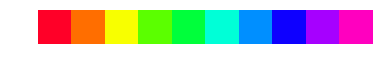

In [16]:
input_data=get_input_data(10, colormap='gist_rainbow')

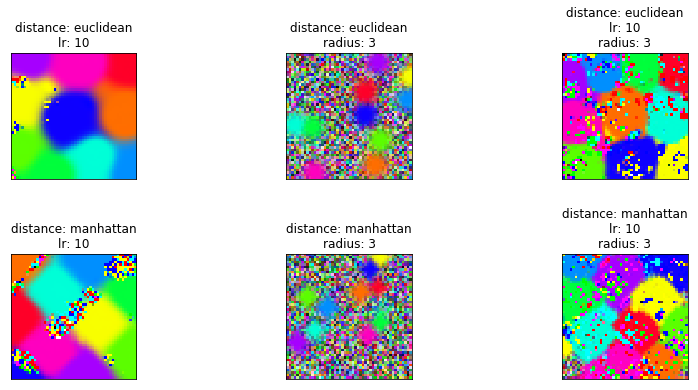

In [17]:
kwargs = {0: {'distance': 'euclidean', 'lr': 10},
          3: {'distance': 'manhattan', 'lr': 10},
          1: {'distance': 'euclidean', 'radius': 3},
          4: {'distance': 'manhattan', 'radius': 3},
          2: {'distance': 'euclidean', 'lr': 10, 'radius': 3},
          5: {'distance': 'manhattan', 'lr': 10, 'radius': 3}}
fig, axs = plt.subplots(2, 3, figsize=(14, 6))
plt.subplots_adjust(hspace=0.6)
for i in range(len(kwargs)):
    k_learner = Kohonen((50, 50), input_data, **kwargs[i])
    k_learner.fit(1000)
    axs[i//3,i%3].imshow(k_learner.weights.clip(0,1))
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3,i%3].set_title("\n".join([f'{k}: {v}' for k,v in kwargs[i].items()]))

# Animation

In [29]:
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output

In [42]:
class AnimateKohonen(Kohonen):
    """
    Implementation of Kohonen SOM. Accepts network size and input_data.
    """

    def __init__(self, network_size, input_data, *args, **kwargs):
        """
        Instantiate a Kohonen object with specific network size and input_data
        (network).

        Parameters:
        ----------
        network_size: tuple
            Dimensions associated with the Kohonen SOM
        input_data: np.array
            Collection of vectors of size 3 (RGB)
            e.g. np.random.random((20,3))

        Optional Parameters:
        ----------
        lr: int
            Initial Learning Rate, default 0.1
        radius: int
            Initial Radius, default max(network_size) / 2
        distance: str
            Distance Metric, default 'euclidean'
            Available alternative is 'manhattan'
        """
        super().__init__(network_size, input_data, *args, **kwargs)
        self.lr_history = []
        self.radius_history = []

    def _update_learning_rate(self, epoch, lmbda):
        """
        Update the learning rate for a given iteration. The learning rate
        exponentially decays over the N iterations in the training loop.

        Parameters:
        ----------
        epoch: int
            Current iteration in training loop
        lbmda: int
            time constant used in exponential decay of the learning rate.
        """
        super()._update_learning_rate(epoch, lmbda)
        self.lr_history.append(self.lr)

    def _update_radius(self, epoch, lmbda):
        """
        Update the radius for a given iteration. The radius
        exponentially decays over the N iterations in the training loop.

        Parameters:
        ----------
        epoch: int
            Current iteration in training loop
        lbmda: int
            time constant used in exponential decay of the learning rate.
        """
        super()._update_radius(epoch, lmbda)
        self.radius_history.append(self.radius)

    def _setup_graph(self, epochs):
        """
        Set up all subplots.

        Parameters:
        ----------
        epochs: int
            Number of epochs to train the network over.
            Used to set the x-axis limits.
        """
        fig = plt.figure(figsize=(8, 6))
        gs = GridSpec(2, 2, width_ratios=[1, 2.5])

        # Plot Weights
        ax0 = fig.add_subplot(gs[:, 1])
        ax0.set_title('Weights', fontsize=16)
        ax0 = plt.imshow(np.zeros(self.network_size))
        plt.axis('off')
        line0 = ax0

        # Plot Learning Rate
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.set_title('Learning Rate', fontsize=16)
        ax1.set_xlabel('epochs')
        ax1.set_ylabel('Learning Rate (lr)')
        ax1.set_xlim([1, epochs])
        ax1.set_ylim([0, self.init_lr*1.1])
        line1, = ax1.plot([], [])

        # Plot Radius
        ax2 = fig.add_subplot(gs[1, 0])
        ax2.set_title('Radius', fontsize=16)
        line2, = ax2.plot([], [])
        # ax2.set_ylim(-20, 5)
        ax2.set_xlim([1, epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('Radius (r)')
        ax2.set_ylim([0, self.init_radius*1.1])

        ttl = fig.suptitle(f'Epoch: 0/{epochs}')
        fig.tight_layout()
        fig.subplots_adjust(top=0.85)
        plt.close()
        return line0, line1, line2, ttl, fig

    def fit(self, epochs):
        """
        Training the network over a specific number of "epochs" or iterations.
        For each pass, the learning rate & radius are updated (decay), which
        are then used to calculate the influence of each node in the network.
        Following this, the weights of each node are updated using the
        aformentioned updated variables.

        Parameters:
        ----------
        epochs: int
            number of iterations to train the network
        """
        # Get Templated Graphs
        line0, line1, line2, ttl, fig = self._setup_graph(epochs)

        lmbda = (epochs-1) / np.log(self.init_radius)

        for epoch in range(epochs):
            # Update learning rate & radius
            self._update_learning_rate(epoch, lmbda)
            self._update_radius(epoch, lmbda)

            # Select a random vector (colour) from input data
            idx = np.random.randint(len(self.input_data))
            vector = self.input_data[idx]

            # Calculate Influences and Update Weights
            infl = self._influence(vector)
            self._update_weights(infl, vector)
            
            # Update Graph Intermittently e.g. every (i**2)th iteration.
            # e.g. update frequently at early iterations but less frequently onwards. 
            if epoch in [i**2 for i in range(int(np.sqrt(epochs)))] or epoch == epochs-1:
                line0.set_data(self.weights)
                line1.set_data(range(1, epoch+1), self.lr_history[:epoch])
                line2.set_data(range(1, epoch+1), self.radius_history[:epoch])
                ttl.set_text(f'Epoch: {epoch+1}/{epochs}')
                clear_output(wait=True)
                display(fig)

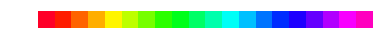

In [43]:
input_data=get_input_data(20, colormap='gist_rainbow')

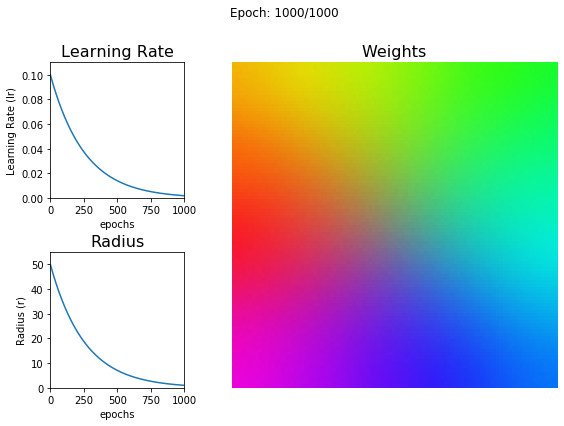

In [21]:
network_size = (100,100)
k_learner = AnimateKohonen(network_size, input_data)
k_learner.fit(1000)